In [5]:
import pandas as pd
import numpy as np
# tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, Flatten, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
#matplotlib
import matplotlib.pyplot as plt

In [2]:
#df= pd.read_csv(r"D:/shyena/ddos/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df= pd.read_csv(r"DDos.pcap_ISCX.csv")

In [3]:
df.columns = df.columns.str.strip()
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [4]:
df['Label'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})

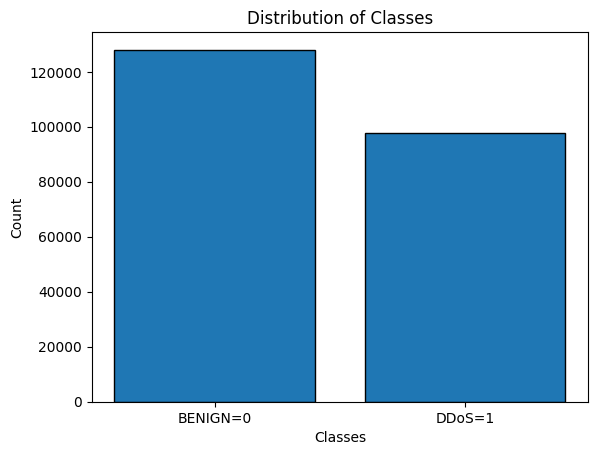

In [7]:
plt.bar([0, 1], df['Label'].value_counts(), edgecolor='black')
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [8]:
df=df.dropna()

In [9]:
(df.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                          False
Length: 79, dtype: bool

In [10]:
df = df.fillna(0)  # Replace NaN with 0
df = df.replace([np.inf, -np.inf], 0)

In [11]:
df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [12]:
df=df.astype(int)

In [13]:
X = df.drop('Label',axis=1)
y = df['Label']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Impute missing values (replace NaNs with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Determine the number of columns (features) in your DataFrame
num_columns = df.shape[1]

# Set an appropriate value for k (less than or equal to the number of columns)
k = min(20, num_columns)  # Adjust this as needed

# Initialize SelectKBest with the scoring function
k_best = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the imputed data to select the top 10 features
X_new = k_best.fit_transform(X_imputed, y)

C:\Users\prerana\anaconda3\envs\my_new_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\prerana\anaconda3\envs\my_new_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [16]:
# Get the boolean mask of selected features
selected_features_mask = k_best.get_support()
print(selected_features_mask)

[ True False False False  True False  True False  True False  True  True
  True  True False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True  True  True  True  True False False False False False
  True False False False  True  True  True False False False False False
 False False False  True False False False False False  True False False
 False False False False False False]


In [17]:
elected_feature_names = X.columns[selected_features_mask]

In [18]:
elected_feature_names

Index(['Destination Port', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd IAT Total',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'URG Flag Count',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Subflow Fwd Bytes', 'min_seg_size_forward'],
      dtype='object')

In [19]:
new_columns=['Destination Port', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd IAT Total',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'URG Flag Count',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Subflow Fwd Bytes', 'min_seg_size_forward']

In [20]:
df_new=X[new_columns]

In [21]:
df_new.columns

Index(['Destination Port', 'Total Length of Fwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Bwd IAT Total',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'URG Flag Count',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Subflow Fwd Bytes', 'min_seg_size_forward'],
      dtype='object')

In [22]:
df_new['label']=df['Label']

C:\Users\prerana\AppData\Local\Temp\ipykernel_39556\3160568258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label']=df['Label']


In [23]:
X1=df_new.iloc[:,:-1].values
y1=df_new.iloc[:,-1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [25]:
X_test.shape, y_test.shape

((67723, 20), (67723,))

In [26]:
ann = Sequential()
ann.add(Dense(units=20,activation='sigmoid'))
ann.add(Dense(units=20,activation='sigmoid'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer ='adam' , loss='categorical_crossentropy' , metrics= ['accuracy'])

In [31]:
early_stopping = EarlyStopping(monitor='loss', patience=10)

In [29]:
class ClassificationModel:
    def __init__(self, numerical_feature_count, num_classes):
        """
        Initializes the ClassificationModel class.
        
        :param numerical_feature_count: Number of numerical features.
        :param num_classes: Number of classes in the target variable.
        """
        self.numerical_feature_count = numerical_feature_count
        self.num_classes = num_classes
        self.model = self._build_model()

    def _build_model(self):
        """
        Builds the TensorFlow model for classification tasks.
        
        :return: Compiled TensorFlow model.
        """
        # Numerical input
        numerical_input = Input(shape=(self.numerical_feature_count,), name="numerical_input")
        x = BatchNormalization()(numerical_input)  # Normalize numerical inputs

        # Fully connected layers
        x = Dense(128, activation='relu')(x)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.3)(x)
        x = Dense(32, activation='relu')(x)

        # Output layer
        output = Dense(self.num_classes, activation='softmax', name="output")(x)
        # Create model
        model = Model(inputs=numerical_input, outputs=output)

        # Create model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model

    def summary(self):
        """Prints the summary of the model."""
        self.model.summary()

numerical_feature_count = 20
num_classes = 2

model = ClassificationModel(numerical_feature_count, num_classes).model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 numerical_input (InputLayer  [(None, 20)]             0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               2688      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0     

In [32]:
#training the model on training set
model.fit(X_train,y_train,batch_size=32,epochs=100,callbacks=[early_stopping])

Epoch 1/100
4939/4939 [==============================] - 10s 2ms/step - loss: 0.0574 - accuracy: 0.9841
Epoch 2/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0558 - accuracy: 0.9848
Epoch 3/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0567 - accuracy: 0.9842
Epoch 4/100
4939/4939 [==============================] - 10s 2ms/step - loss: 0.0556 - accuracy: 0.9844
Epoch 5/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0559 - accuracy: 0.9842
Epoch 6/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0559 - accuracy: 0.9845
Epoch 7/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0561 - accuracy: 0.9845
Epoch 8/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0558 - accuracy: 0.9844
Epoch 9/100
4939/4939 [==============================] - 11s 2ms/step - loss: 0.0566 - accuracy: 0.9845
Epoch 10/100
4939/4939 [==============================] - 11s 2m